# TP : Prédiction de la consommation énergétique de bâtiments
Dans ce TP, vous allez développer un modèle de prédiction de la consommation énergétique des bâtiments en utilisant un dataset avec différentes caractéristiques. L'objectif est de préparer les données, d'entraîner un modèle de régression et d'évaluer sa performance. Ce modèle sera utilisé pour estimer la consommation de futurs bâtiments, pour lesquels on ne dispose pas encore de relevé fiable.

In [7]:
from pathlib import Path

import pandas as pd
pd.set_option('display.max_columns', None)

In [8]:
DATA_DIR = Path("../../data")

## Chargement des données et exploration initiale
La première étape consiste à charger les données et à effectuer une première exploration pour comprendre leur structure. Chargez le fichier building_energy_benchmarking.csv et affichez les premières lignes du dataset.

In [9]:
energy_df = pd.read_csv(Path(DATA_DIR, "building_energy_benchmarking.csv"))

In [10]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [11]:
energy_df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [12]:
energy_df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


## Filtrage des données invalides
Proposer un moyen de filtrer les données en fonction de la valeur dans la colonne `DefaultData`, qui indique si ce sont des données synthétiques, qu'on va considérer comme non représentatives pour notre futur modèle.

In [15]:
mask_not_default_data = ~ energy_df["DefaultData"]
energy_df[mask_not_default_data]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,Seattle,WA,NaN,2524039059,1,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,1982,1.0,1,18261,0,18261,Other - Recreation,Other - Recreation,18261.0,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,56.200001,126.000000,136.600006,9.320821e+05,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,False,NaN,Compliant,NaN,20.33,1.11
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gy

## Préparation des données
Il est maintenant temps de préparer les caractéristiques et la cible pour l'entraînement du modèle. Sélectionnez les colonnes pertinentes pour l'entraînement et préparez la variable cible `SiteEnergyUse(kBtu)`.

In [20]:
columns_to_keep = [
    "NumberofBuildings",
    "NumberofFloors",
    "PropertyGFAParking",
    "PropertyGFABuilding(s)",
    "Neighborhood",
    "YearBuilt",
    # "LargestPropertyUseType", # à traiter plus tard
    "SiteEnergyUse(kBtu)",
]

energy_df = energy_df[columns_to_keep]

In [18]:
energy_df.head()

,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,YearBuilt,SiteEnergyUse(kBtu)
0,1.0,12,0,88434,DOWNTOWN,1927,7226362.5
1,1.0,11,15064,88502,DOWNTOWN,1996,8387933.0
2,1.0,41,196718,759392,DOWNTOWN,1969,72587024.0
3,1.0,10,0,61320,DOWNTOWN,1926,6794584.0
4,1.0,18,62000,113580,DOWNTOWN,1980,14172606.0


### Gestion des valeurs manquantes

Avant d'entraîner notre modèle, il est crucial de gérer les valeurs manquantes dans le jeu de données. Les valeurs manquantes peuvent provenir de données non collectées ou d'informations non applicables à certaines propriétés. 

1. Identifiez les colonnes qui contiennent des valeurs manquantes.
2. Décidez d'une stratégie de gestion, comme le remplissage avec une valeur par défaut, la moyenne/médiane ou la suppression des lignes/colonnes concernées.
3. Implémentez cette stratégie pour vous assurer que le jeu de données est prêt pour l'analyse et la modélisation.


In [19]:
energy_df.isna().sum(axis=0)

NumberofBuildings         8
NumberofFloors            0
PropertyGFAParking        0
PropertyGFABuilding(s)    0
Neighborhood              0
YearBuilt                 0
SiteEnergyUse(kBtu)       5
dtype: int64

In [21]:
energy_df = energy_df[
    ~ energy_df["SiteEnergyUse(kBtu)"].isna()
]

In [ ]:
energy_df.isna().sum(axis=0)

In [24]:
energy_df["NumberofBuildings"].fillna(energy_df["NumberofBuildings"].median(), inplace=True)

In [25]:
energy_df.isna().sum(axis=0)

NumberofBuildings         0
NumberofFloors            0
PropertyGFAParking        0
PropertyGFABuilding(s)    0
Neighborhood              0
YearBuilt                 0
SiteEnergyUse(kBtu)       0
dtype: int64

### Ratios des sources d'énergie

En particulier, même si on ne dispose pas de relevés des valeurs absolues, on va supposer qu'on connaîtra la répartition relative des sources d'énergie du futur bâtiment, et que cela peut avoir un impact sur la modélisation de sa consommation future. Ajoutez une étape pour calculer la proportion de l'énergie totale consommée par chaque source disponible dans le jeu de données.


In [ ]:
# Votre code ici

### Encodage personnalisé des types d’usage avec les surfaces

!! Attention question plus difficile !!

Dans cette étape, nous allons encoder les colonnes représentant les types d’usage des bâtiments (type primaire, secondaire, et tertiaire) en créant une nouvelle colonne pour chaque type d’usage unique présent dans le dataset.

Cible -> chaque colonne représentera un type d’usage, et sa valeur contiendra :
- La superficie de l’usage primaire si ce type est l’usage primaire du bâtiment.
- La superficie de l’usage secondaire si ce type est l’usage secondaire.
- La superficie de l’usage tertiaire si ce type est l’usage tertiaire.
- 0 si ce type d’usage n’est pas associé au bâtiment.

Étapes à suivre :
- Identifier toutes les modalités uniques des types d’usage présentes dans les colonnes LargestPropertyUseType, SecondLargestPropertyUseType, et ThirdLargestPropertyUseType.
- Créer une colonne pour chaque type d’usage.
- Renseigner la superficie correspondante pour chaque bâtiment dans la colonne associée au type d’usage, en fonction de son rôle (primaire, secondaire, ou tertiaire).
- Remplir les valeurs par 0 pour les colonnes des types d’usage qui ne s’appliquent pas au bâtiment.

In [ ]:
# Votre code ici

In [26]:
X = energy_df.drop("SiteEnergyUse(kBtu)", axis=1)
y = energy_df["SiteEnergyUse(kBtu)"]

In [27]:
X

,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,YearBuilt
0,1.0,12,0,88434,DOWNTOWN,1927
1,1.0,11,15064,88502,DOWNTOWN,1996
2,1.0,41,196718,759392,DOWNTOWN,1969
3,1.0,10,0,61320,DOWNTOWN,1926
4,1.0,18,62000,113580,DOWNTOWN,1980
...,...,...,...,...,...,...
3371,1.0,1,0,12294,GREATER DUWAMISH,1990
3372,1.0,1,0,16000,DOWNTOWN,2004
3373,1.0,1,0,13157,MAGNOLIA / QUEEN ANNE,1974
3374,1.0,1,0,14101,GREATER DUWAMISH,1989


In [28]:
y

0       7.226362e+06
1       8.387933e+06
2       7.258702e+07
3       6.794584e+06
4       1.417261e+07
            ...     
3371    8.497457e+05
3372    9.502762e+05
3373    5.765898e+06
3374    7.194712e+05
3375    1.152896e+06
Name: SiteEnergyUse(kBtu), Length: 3371, dtype: float64

## Prétraitement des données : Mise à l'échelle et encodage
Nous devons maintenant normaliser les données numériques et encoder les variables catégorielles. Utilisez `StandardScaler` pour la normalisation et `pd.get_dummies` pour encoder la variable catégorielle `Neighborhood`.

In [29]:
from sklearn.preprocessing import StandardScaler

X = pd.get_dummies(X, columns=["Neighborhood"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
type(X_scaled)

numpy.ndarray

## Entraînement du modèle de régression linéaire
Cette cellule utilise un modèle de régression linéaire pour prédire la consommation d'énergie (`SiteEnergyUse(kBtu)`) en fonction des caractéristiques préparées. Elle réalise l'entraînement du modèle sur les données d'entraînement. En adaptant les noms de variables si besoin, l'exécuter et observer son résultat.


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=9)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
model.coef_

array([ 4.34561053e+06, -4.13465770e+05, -7.72192670e+04,  1.48542215e+07,
       -2.10598939e+05, -4.81679551e+18, -1.15595945e+18, -4.45176827e+18,
       -2.26350054e+18, -3.86522270e+18, -4.37301067e+17, -9.53158335e+18,
       -8.74212758e+17, -8.66078647e+18, -7.98458088e+18, -6.66622156e+18,
       -8.40348053e+18, -5.15207016e+18, -6.98518551e+18, -6.12378116e+18,
       -2.81674239e+18, -1.44821009e+18, -4.20241885e+18, -5.49456920e+18])

## Évaluation du modèle
Cette cellule sert à évaluer la performance du modèle en calculant l'erreur quadratique moyenne (MSE) et le coefficient de détermination R² sur les données de test. En adaptant les noms de variables si besoin, l'exécuter et observer son résultat.

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 44718005406344.06
R-squared: 0.34089851406495375


## Visualisations des résultats
Enfin, visualisez les résultats en traçant un graphique des prédictions vs valeurs réelles et un histogramme des erreurs.

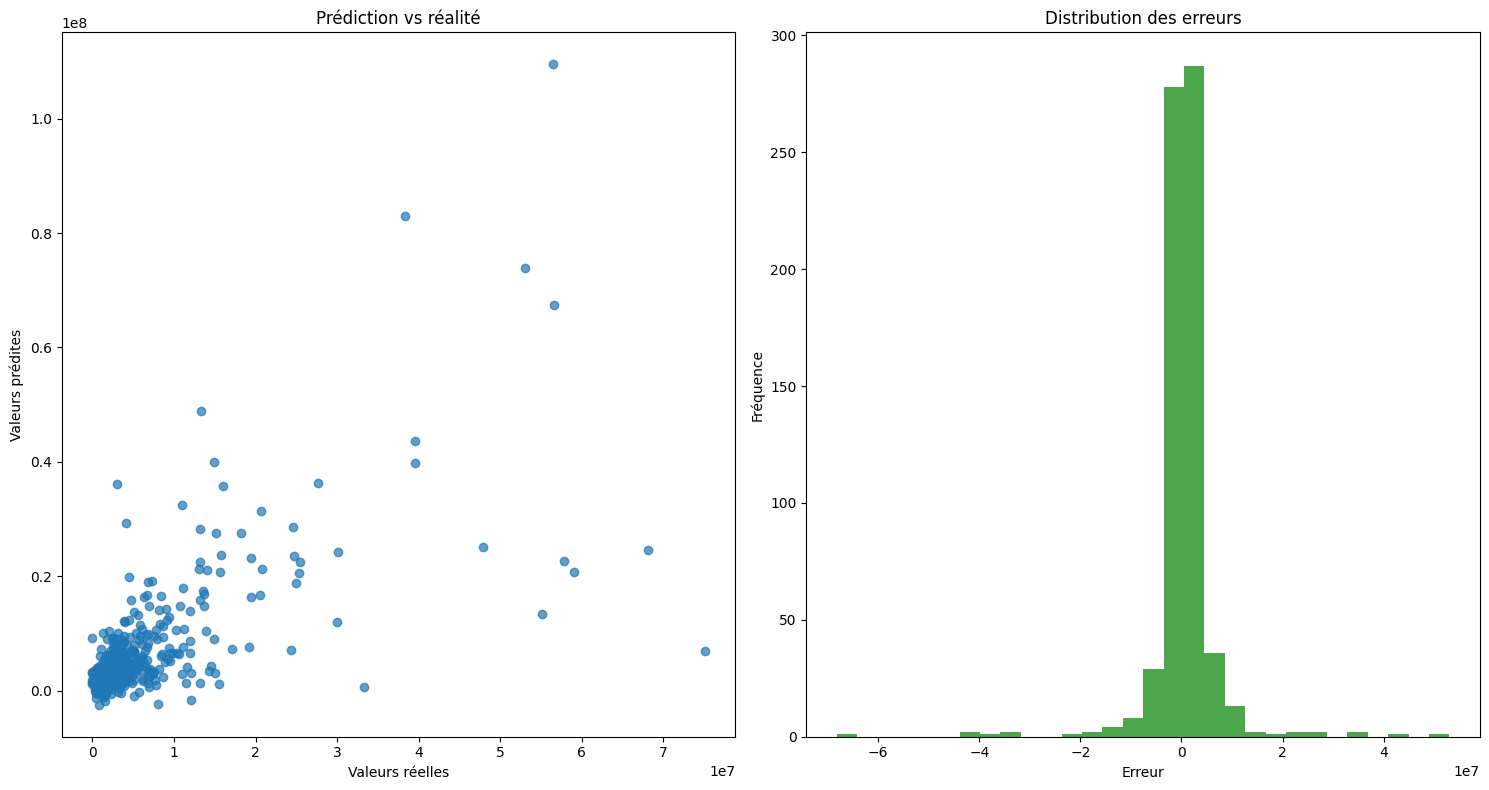

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Prédiction vs réalité")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")

plt.subplot(1, 2, 2)
errors = y_pred - y_test
plt.hist(errors, bins=30, alpha=0.7, color="green")
plt.title("Distribution des erreurs")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()